In [1]:
import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns

# 1. Apply SMOTE for upsampling the data

    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.


2. Apply TomekLinks for downsampling

    - It is important to remember that it does not make the two classes equal but only removes the points from the majority class that are close to other points in minority class.
    - Use logistic regression to fit the model and compute the accuracy of the model.
    - Use decision tree classifier to fit the model and compute the accuracy of the model.
    - Compare the accuracies of the two models.
    - You can also apply this algorithm one more time and check the how the imbalance in the two classes changed from the last time.



In [2]:
df = pd.read_csv(r"C:\Users\Pedro Gomes\Desktop\Filipa_Ironhack\Labs\ML\lab-cross-validation\files_for_lab\Customer-Churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.isna().sum()
# there only a few null values in totalcharges which i'm not taking for now because I will not be using this numerical feature

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# since contract ir an object type and it is actualla a integer lets convert is 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
# First get all the categorical variable, since this is a categorical problem
df_cat = df.select_dtypes(object)
df_cat

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,No
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,No
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,No
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,No
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,No
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,No
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes


In [7]:
df_cat['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [8]:
# I have to first one hot encode every featuro so I can use it further
# def one_hot_encode(df):
  
#     for column in df:
#         unique_values = df[column].unique()
        
#         if len(unique_values) <=3:
            # Perform one-hot encoding for binary columns
#             df = pd.get_dummies(df, columns=[column], drop_first=False, dtype=int)
              
#     return df

In [9]:
# df_cat = one_hot_encode(df_cat)

In [10]:
from sklearn.preprocessing import LabelEncoder

df_cat = df_cat.apply(LabelEncoder().fit_transform)

In [11]:
df_cat.dtypes

gender              int32
Partner             int32
Dependents          int32
PhoneService        int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
Churn               int32
dtype: object

# SMOTE 

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
# Lets first do a train test split to do the oversampling only on the train data

from sklearn.model_selection import train_test_split

X = df_cat.drop(['Churn'], axis=1)
y = df_cat['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


# concat the data to do a SMOTe oversamping 
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,Churn
2920,0,1,0,1,2,2,2,2,2,2,2,0
2966,0,0,0,0,0,0,0,0,2,2,0,0
6099,0,1,1,1,1,1,1,1,1,1,2,0
5482,1,1,1,1,0,0,2,2,2,2,1,1
2012,0,1,0,1,2,2,2,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4931,1,1,0,1,0,0,2,2,2,2,0,0
3264,0,0,1,1,0,0,2,2,2,0,0,0
1653,1,1,0,1,1,1,1,1,1,1,2,0
2607,1,0,0,1,0,0,0,0,0,0,0,1


In [14]:
X = df_train.drop(['Churn'], axis=1)
y = df_train['Churn']

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

df_smote = pd.concat([X_sm,y_sm], axis = 1)
df_smote
df_smote.sum() 

gender              3937
Partner             3515
Dependents          1935
PhoneService        7474
OnlineSecurity      5484
OnlineBackup        6680
DeviceProtection    6736
TechSupport         5397
StreamingTV         8094
StreamingMovies     8060
Contract            4022
Churn               4133
dtype: int64

In [15]:
df_smote['Churn'].value_counts()

0    4133
1    4133
Name: Churn, dtype: int64

# Logistic Regression

In [16]:
# Now lets apply the model to the data smote and check the accuracy of the model 
X_train = df_smote.drop(['Churn'], axis=1)
y_train = df_smote['Churn']

from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
pred = model_LR.predict(X_test)

print("Accuracy: ", model_LR.score(X_test, y_test))


Accuracy:  0.6891412349183819


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier 

X_train = df_smote.drop(['Churn'], axis=1)
y_train= df_smote['Churn']

# open the model
model_DT= DecisionTreeClassifier(max_depth = 12) 

# fit the model - train the model 
model_DT.fit(X_train, y_train)
results = model_DT.score(X_test,y_test)

print('The accuracy of this model is:', results)

The accuracy of this model is: 0.7224982256919801


In [18]:
max_depth = range(1,15)
test = []
train = []
for depth in max_depth:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))


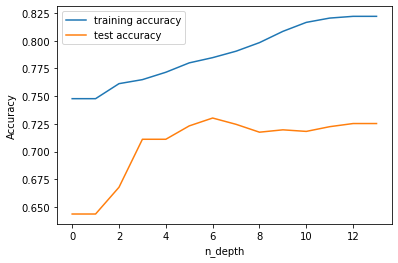

In [19]:
#  Plot to find the best max_depth   
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

# K-fold validation

In [20]:
from sklearn.model_selection import cross_validate
result_LR = cross_validate(model_LR, df_cat.drop(['Churn'], axis=1), df_cat['Churn'], cv = 10)
result_DT = cross_validate(model_DT, df_cat.drop(['Churn'], axis=1), df_cat['Churn'], cv = 10)

In [21]:
print('Accuracy of LR model: ', result_LR['test_score'].mean())
print('Accuracy of DT model: ', result_DT['test_score'].mean())

Accuracy of LR model:  0.7723952288845906
Accuracy of DT model:  0.7427212282398452


# TOMEKLINKS

In [22]:
from imblearn.under_sampling import TomekLinks

model_tl = TomekLinks()
X = df_train.drop("Churn", axis = 1)
y = df_train["Churn"]
x_tl, y_tl = model_tl.fit_resample(X,y)
y_tl.value_counts()

# concat the the x and y
df_TMKL = pd.concat([x_tl, y_tl], axis = 1)
df_TMKL['Churn'].value_counts()

0    4131
1    1501
Name: Churn, dtype: int64

# Logistic Regression

In [31]:
# Use Logistic regression model with undersampling 

X_train = df_TMKL.drop("Churn", axis = 1)
y_train = df_TMKL["Churn"]


model_LR2 = LogisticRegression()
model_LR2.fit(X_train, y_train)
pred = model_LR2.predict(X_test)

print("Accuracy: ", model_LR2.score(X_test, y_test))



Accuracy:  0.7558552164655784


# Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier 

X_train = df_TMKL.drop(['Churn'], axis=1)
y_train= df_TMKL['Churn']

# open the model
model_DT2= DecisionTreeClassifier(max_depth = 5) 

# fit the model - train the model 
model_DT2.fit(X_train, y_train)
results = model_DT2.score(X_test,y_test)

print('The accuracy of this model is:', results)

The accuracy of this model is: 0.758694109297374


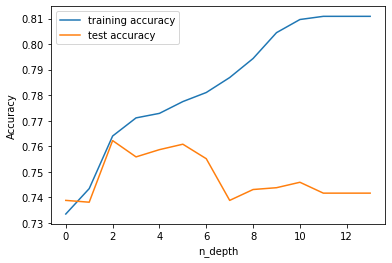

In [33]:
max_depth = range(1,15)
test = []
train = []
for depth in max_depth:
    model = DecisionTreeClassifier(max_depth = depth)
    model.fit(X_train, y_train)
    test.append(model.score(X_test,y_test))
    train.append(model.score(X_train,y_train))

    #  Plot to find the best max_depth   
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()

# K-fold

In [36]:
from sklearn.model_selection import cross_validate
result_LR2 = cross_validate(model_LR2, df_cat.drop(['Churn'], axis=1), df_cat['Churn'], cv = 10)
result_DT2 = cross_validate(model_DT2, df_cat.drop(['Churn'], axis=1), df_cat['Churn'], cv = 10)

In [37]:
print('Accuracy of LR model: ', result_LR2['test_score'].mean())
print('Accuracy of DT model: ', result_DT2['test_score'].mean())

Accuracy of LR model:  0.7723952288845906
Accuracy of DT model:  0.765297187298517
